# Basic Steps for Masking :-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

**Colors for cmap :-**<br>
 Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r


**First we will read the image of which we want to change the background :-**

Height of image is 514, Width is 816 & Channels are 3.


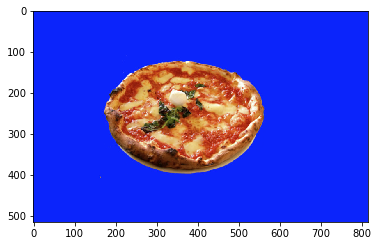

In [2]:
image = cv2.imread('images/pizza_bluescreen.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print("Height of image is {}, Width is {} & Channels are {}.".format(image.shape[0], image.shape[1], image.shape[2]))
plt.imshow(image)
plt.show()

**Now, will have to set some threshold values as lower and upper. All the values of original image matrix which will be lower than the LOWER threshold will be converted to 0 (Black) & all the values above the UPPER threshold will be converted to 255 (White.)** 

Height of image is 514, Width is 816 & Channel is 1.


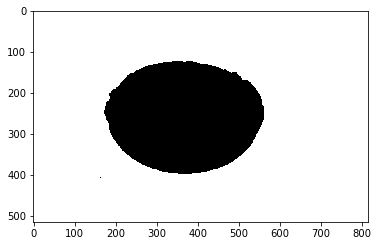

In [4]:
# Threshold value Upper & Lower. Try different values in Threshold to get better results.
lower = np.array([0,0,205])
upper = np.array([200,200,255])
mask = cv2.inRange(image,lower,upper)  # Will apply Thresholds on image.
print("Height of image is {}, Width is {} & Channel is 1.".format(mask.shape[0], mask.shape[1]))
plt.imshow(mask, cmap="gray")
plt.show()

**Now, will cut out the space required by object in new background. So that, later on can combine both.**

(1047, 1920, 3)
(514, 816, 3)


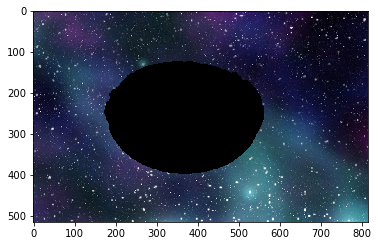

In [11]:
space_background = cv2.imread("images/space_background.jpg")
space_background = cv2.cvtColor(space_background, cv2.COLOR_BGR2RGB)
print(space_background.shape)

# We must equal the shape of both mask & background. So, will crop now this image to the shape of mask image.
space_background = space_background[0:514, 0:816]
print(space_background.shape)

space_background[mask == 0] = [0,0,0]

plt.imshow(space_background)
plt.show()

**In this step we will first copy the object from original image to get colours of it & then will make a new image in which only object will have it's colours and rest area will be black.**

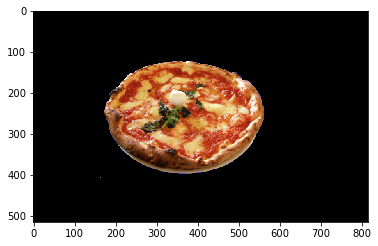

In [12]:
croped_pizza = np.copy(image)
croped_pizza[mask !=0]=[0,0,0]
plt.imshow(croped_pizza)
plt.show()

**Now, let's combine both images.**

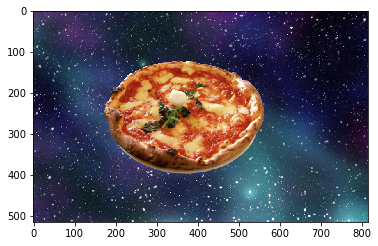

In [13]:
complete_image = space_background + croped_pizza
plt.imshow(complete_image)
plt.show()

**Outlining the edges of pizza**

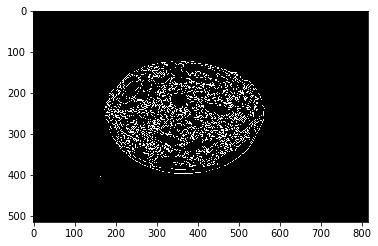

In [23]:
edged_pizza = cv2.Canny(image, 0, 255)
plt.imshow(edged_pizza, cmap="gray")
plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**

The Height is 450, Width is 660 & Channels are 3.


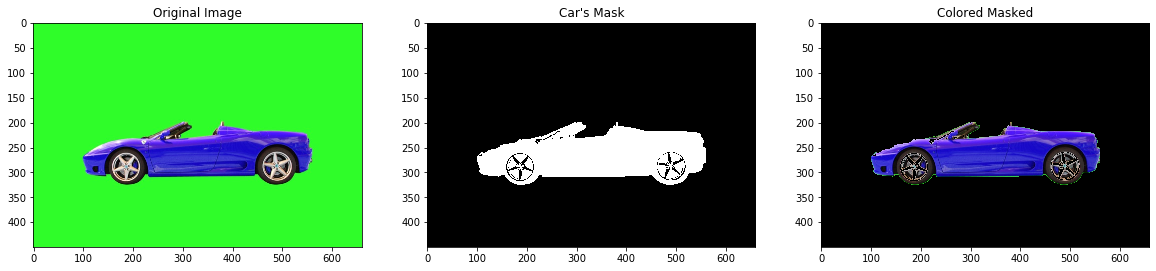

In [29]:
car = cv2.imread("images/car_green_screen.jpg")
# car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
print("The Height is {}, Width is {} & Channels are {}.".format(car.shape[0], car.shape[1], car.shape[2]))
lower = np.array([0,0,0])
upper = np.array([200,200,255])
masked_car = cv2.inRange(car, lower, upper)

color_mask = np.copy(car)
color_mask[masked_car ==0] = [0,0,0]

fig, (ax_1,ax_2, ax_3) = plt.subplots(1,3, figsize=(20,20))
ax_1.imshow(car)
ax_1.set_title("Original Image")
ax_2.imshow(masked_car, cmap="gray")
ax_2.set_title("Car's Mask")
ax_3.imshow(color_mask)
ax_3.set_title("Colored Masked")
plt.show()

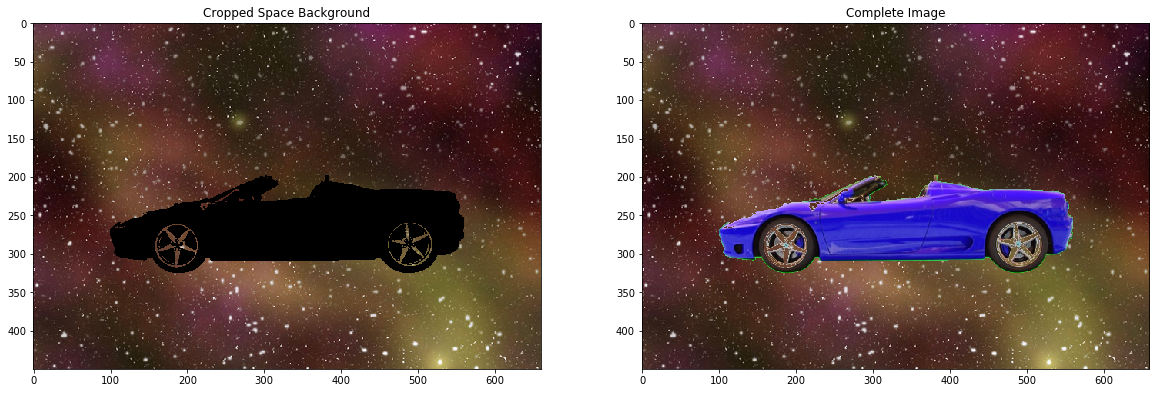

In [30]:
space_background = cv2.imread("images/space_background.jpg", cv2.COLOR_BGR2RGB)

space_background = space_background[0:450, 0:660]

space_background[masked_car != 0] = [0,0,0]

complete_image = space_background + color_mask

fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,20))
ax_1.imshow(space_background)
ax_1.set_title("Cropped Space Background")
ax_2.imshow(complete_image)
ax_2.set_title("Complete Image")
plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**

## Various Thresholding Techniques :-

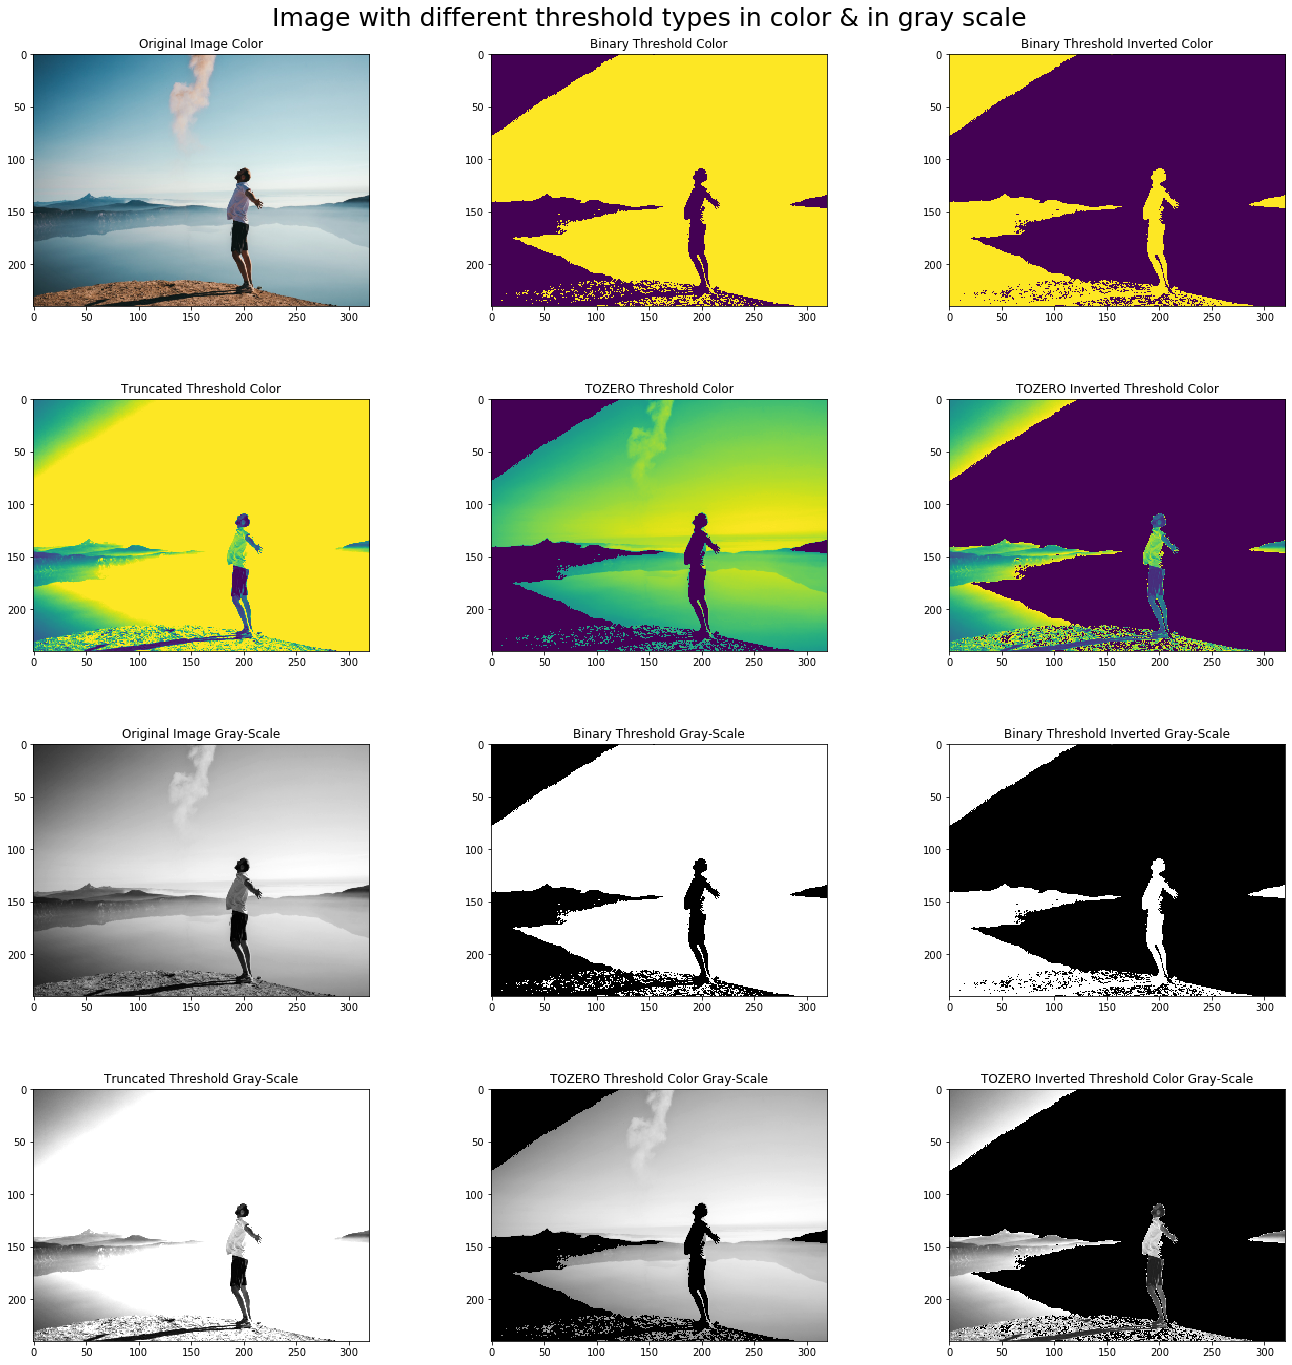

In [34]:
#Reading image from computer
img = cv2.imread('images/free.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Resizing image to make it smaller
img = cv2.resize(img, (320,240))

#Converting color image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Applying threshold to the gray image
ret, thresh1 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_TOZERO_INV)

#Displaying resultant images
fig, ax = plt.subplots(4,3, figsize=(20, 20))
ax[0,0].set_title('Original Image Color')
ax[0,0].imshow(img)
ax[0,1].set_title('Binary Threshold Color')
ax[0,1].imshow(thresh1)
ax[0,2].set_title('Binary Threshold Inverted Color')
ax[0,2].imshow(thresh2)
ax[1,0].set_title('Truncated Threshold Color')
ax[1,0].imshow(thresh3)
ax[1,1].set_title('TOZERO Threshold Color')
ax[1,1].imshow(thresh4)
ax[1,2].set_title('TOZERO Inverted Threshold Color')
ax[1,2].imshow(thresh5)

ax[2,0].set_title('Original Image Gray-Scale')
ax[2,0].imshow(gray_img, cmap="gray")
ax[2,1].set_title('Binary Threshold Gray-Scale')
ax[2,1].imshow(thresh1, cmap="gray")
ax[2,2].set_title('Binary Threshold Inverted Gray-Scale')
ax[2,2].imshow(thresh2, cmap="gray")
ax[3,0].set_title('Truncated Threshold Gray-Scale')
ax[3,0].imshow(thresh3, cmap="gray")
ax[3,1].set_title('TOZERO Threshold Color Gray-Scale')
ax[3,1].imshow(thresh4, cmap="gray")
ax[3,2].set_title('TOZERO Inverted Threshold Color Gray-Scale')
ax[3,2].imshow(thresh5, cmap="gray")
plt.suptitle("Image with different threshold types in color & in gray scale", fontsize=25)
plt.tight_layout(pad=6.0)
plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**